# Multiple Linear Regression & Model Evaluation

 - Multiple Linear Regression
 - Evaluating models by splitting the data in train and test sets
 - k-fold Cross Validation

## Problem Statement
 Predict  the  CO2  Emissions  of a car based on the characteristics of the car

## Dataset

In this example we will be working with the fuel consumption dataset

The source of the dataset https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

This dataset has 14 features with one target variable (CO2 Emissions)

 - Model Year
 - Make
 - Model
  - 4WD/4X4 = Four-wheel drive
  - AWD = All-wheel drive
  - FFV = Flexible-fuel vehicle
  - SWB = Short wheelbase
  - LWB = Long wheelbase
  - EWB = Extended wheelbase
 - Transmission
  - A = automatic
  - AM = automated manual
  - AS = automatic with select shift
  - AV = continuously variable
  - M = manual
  - 3 – 10 = Number of gears
 - Fuel type	
  - X = regular gasoline
  - Z = premium gasoline
  - D = diesel
  - E = ethanol (E85)
  - N = natural gas
 - Fuel consumption
  - City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
 - CO2 emissions
  - the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving
 - CO2 rating
  - the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)
 - Smog rating
  - the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

 


In [2]:
# Import all the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [5]:
#load the dataset
data = pd.read_csv('/Users/sylvia/Desktop/datasets/fuel_consumption.csv')
data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,26,252,4,3
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,3


In [7]:
#Split into dependent and independent vairables

X = data.drop(columns='CO2 Emissions (g/km)').copy()
y = data['CO2 Emissions (g/km)'].copy()

# For simplicity we will drop the columns of model, transmission type, make and vehicle class

X = X.drop(columns=['Make','Model','Vehicle Class','Transmission'])
X.head()

,Model Year,Engine Size (L),Cylinders,Fuel Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Rating,Smog Rating
0,2019,2.4,4,Z,9.9,7.0,8.6,33,6,3
1,2019,3.5,6,Z,12.2,9.0,10.8,26,4,3
2,2019,3.5,6,Z,12.2,9.5,11.0,26,4,3
3,2019,3.0,6,Z,9.1,9.0,9.0,31,5,3
4,2019,3.5,6,Z,11.1,10.8,11.0,26,4,3


- Except the fuel type, all other variables r in numerical form.
- **In a linear regression model we need all indepedent variables to be in numerical format**
- There are few ML algorithms that can work with non-numerical data i.e. categorical data which are decision trees, random forests, and support vector machines.
- Text data is another type of data that can be used as input for machine learning algorithms. There are various algorithms that are specifically designed to work with text data, such as bag of words models, word embedding models, and language models.
- So, while numerical input data is certainly very common in machine learning, it is not the only type of data that can be used as input for these algorithms.

### Encoding Categorical Variables
![](https://i1.wp.com/blog.datascienceheroes.com/content/images/2019/07/one-hot-encoding.png?zoom=1.5&w=300&ssl=1)

<a href="https://www.r-bloggers.com/how-to-use-recipes-package-from-tidymodels-for-one-hot-encoding-%F0%9F%9B%A0/">Source</a>

### One hot encoding for Fuel Type to convert categorical to numerical values

We split 1 column into multiple columns which represent the categories of original feature & the values will be binary in the created columns.

**Need to follow below 3 steps in one-hot encoding**
1. One hot encode categorical variables Fuel Type using pandas getdummies
2. concat the ohe_fuel dummies with original dataframe X
3. drop the column Fuel Type from original dataframe X


In [8]:
X['Fuel Type'].value_counts()

X    500
Z    484
E     38
D     27
Name: Fuel Type, dtype: int64

In [11]:
# One hot encode categorical variables Fuel Type using pandas getdummies

ohe_fuel = pd.get_dummies(X['Fuel Type'],prefix='fuel')  
ohe_fuel.head()

# As fuel prefix used so all categories prefixed with fuel.

,fuel_D,fuel_E,fuel_X,fuel_Z
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [12]:
# concat the ohe_fuel dummies with original dataframe X
X = pd.concat([X,ohe_fuel], axis=1)


# drop the column Fuel Type from original dataframe X
X.drop(columns='Fuel Type',inplace=True)
X.head()

,Model Year,Engine Size (L),Cylinders,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Rating,Smog Rating,fuel_D,fuel_E,fuel_X,fuel_Z
0,2019,2.4,4,9.9,7.0,8.6,33,6,3,0,0,0,1
1,2019,3.5,6,12.2,9.0,10.8,26,4,3,0,0,0,1
2,2019,3.5,6,12.2,9.5,11.0,26,4,3,0,0,0,1
3,2019,3.0,6,9.1,9.0,9.0,31,5,3,0,0,0,1
4,2019,3.5,6,11.1,10.8,11.0,26,4,3,0,0,0,1


## Feature Selection

In [14]:
X['Model Year'].value_counts()

2019    1049
Name: Model Year, dtype: int64

As we observe all values in this column are 2019 i.e. same and hence this feature does not add any value to data, hence we remove this feature.

In [15]:
# since model year is a constant and it does not add any value to our data, we will remove this columns

X.drop(columns='Model Year',inplace=True)
X.head()

,Engine Size (L),Cylinders,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Rating,Smog Rating,fuel_D,fuel_E,fuel_X,fuel_Z
0,2.4,4,9.9,7.0,8.6,33,6,3,0,0,0,1
1,3.5,6,12.2,9.0,10.8,26,4,3,0,0,0,1
2,3.5,6,12.2,9.5,11.0,26,4,3,0,0,0,1
3,3.0,6,9.1,9.0,9.0,31,5,3,0,0,0,1
4,3.5,6,11.1,10.8,11.0,26,4,3,0,0,0,1


## Modelling
### Fitting the linear regression model

In [17]:
# fit the linear regression and predict the values

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [22]:
# print the intercept and the coefficients of the model
print("Intercept for linear regression model is: \n", lr.intercept_)
print("\nCoefficients for linear regression model are:\n ", lr.coef_)

Intercept for linear regression model is: 
 3.915969042818176

Coefficients for linear regression model are:
  [ 3.89157316e-01  1.28714755e-01  6.64377496e+00  5.78325754e+00
  9.59937808e+00 -1.97337339e-01 -9.29293689e-01 -2.08860879e-02
  4.97455958e+01 -8.88669151e+01  1.98693340e+01  1.92519852e+01]


In [23]:
# predict the values using liner regression
y_pred = lr.predict(X)

In [24]:
# calculate the r2 score of the model
print("R2 score for the linear regression model is:", r2_score(y,y_pred))

R2 score for the linear regression model is: 0.9973909387035239


### Residual Plot

In [38]:
residuals = y-y_pred

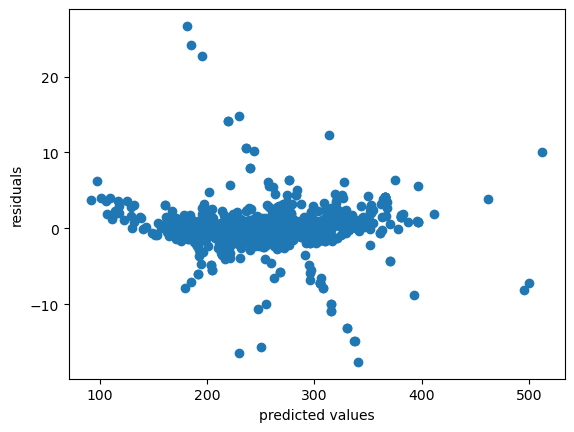

In [41]:
plt.scatter(y_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('residuals')

plt.show()

If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate. In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well. We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.

### Histogram of error/residuals

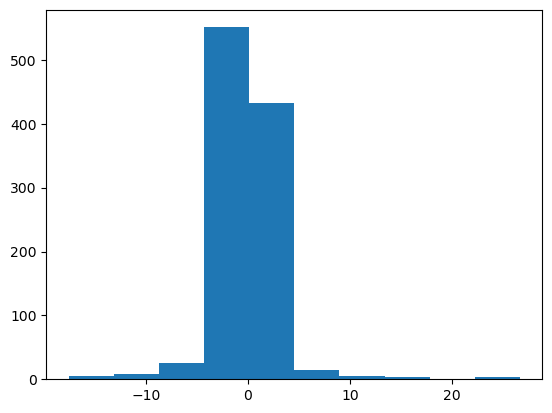

In [42]:
plt.hist(residuals)
plt.show()

## Evaluating Model

### Splitting the dataset in train and test sets
![](https://www.researchgate.net/profile/Brian_Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png)

<a href="https://www.researchgate.net/figure/Train-Test-Data-Split_fig6_325870973">Source</a>

In [43]:
# import the required sklearn module
from sklearn.model_selection import train_test_split

# split the data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1049, 12)
(786, 12)
(263, 12)


In [44]:
# Fit the linear regression model on training dataset
lr = LinearRegression()
lr.fit(X_train,y_train)

print("Intercept: ",lr.intercept_)
print("\nCoefficients: ",lr.coef_)


Intercept:  1.5038477345166257

Coefficients:  [ 3.38575872e-01  1.22343090e-01  7.04877332e+00  6.06490215e+00
  9.04760113e+00 -1.59948017e-01 -8.72767088e-01 -3.29546500e-02
  4.90906747e+01 -8.79426695e+01  1.97208817e+01  1.91311131e+01]


In [45]:
# predict the values from model on test set
y_pred = lr.predict(X_test)

# evaluate the model using R2 score
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  0.9976973943741447


## Cross Validation
<img src="https://i.stack.imgur.com/8uEci.png" width=350 height=350>

<a href="https://stackoverflow.com/questions/58821599/splitting-a-data-set-for-k-fold-cross-validation-in-sci-kit-learn">Source</a>

In [21]:
# import the cross validation score method 
from sklearn.model_selection import cross_val_score

# calculate the scores for 10 fold cross validation
scores = cross_val_score(lr,X_train,y_train, cv=10)
scores

array([0.99871287, 0.99597855, 0.99318827, 0.9958864 , 0.99759783,
       0.99730572, 0.99881188, 0.99720628, 0.99645163, 0.99756821])

# References

k-fold - https://scikit-learn.org/stable/modules/cross_validation.html


